Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

Домашнее задание 1 (теоретическая часть)
Здесь предлагается то, что полезно знать и уметь для успешного прохождения курса (да и без курса полезно)

ML:
1. вспомнить базовые алгоритмы машинного обучения: линейные модели, "деревянные"
2. повторить метрики качества в задачах классификации/регрессии. (например, понимать что такое roc auc и как его интерпретировать и т.д)
3. вспомнить из каких этапов состоит решение ML-задачи и уметь объяснить каждый из этапов: подготовка данных, feature engineering, modelling, evaluation, etc
4. кроссвалидация

Теория вероятностей и статистика:
1. Генеральная совокупность и выборка
2. Базовые статистики: среднее, медиана, дисперсия
3. Распределения: нормальное, бернулли, пуассона и т.д
4. Нулевая и альтернативная гипотезы
5. статистические тесты

Python:
1. структуры данных: set, list, dict, tuple, etc
2. циклы, условия
3. numpy/pandas/sklearn

Полезные ссылки  
Метрики качества - https://habr.com/ru/company/ods/blog/328372/   
roc auc - https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/   
Основы статистики: просто о сложных формулах - https://habr.com/ru/company/stepic/blog/250527/   
Теория вероятностей в работе программиста (вебинар) - https://geekbrains.ru/events/129   
Туториал по машинному обучению (sklearn) - https://scikit-learn.org/stable/tutorial/basic/tutorial.html   
Туториал по github - https://guides.github.com/activities/hello-world/

Домашнее задание 2 (практическая часть)
Ноутбук HW1.ipynb (есть в директории занятия)

Нужные пакеты и библиотеки:
- plotly
- imblearn
- yellowbrick

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [2]:
print('Доля мужчин в датасете: ', df[df.gender == 'Male']['gender'].count() / df['gender'].count())
print('Доля женщин в датасете: ', df[df.gender == 'Female']['gender'].count() / df['gender'].count())
print('Соотношение мужчин и женщин в датасете: ', df[df.gender == 'Male']['gender'].count() / df[df.gender == 'Female']['gender'].count() )

Доля мужчин в датасете:  0.504756495811444
Доля женщин в датасете:  0.495243504188556
Соотношение мужчин и женщин в датасете:  1.0192087155963303


##### 2. Какое количество уникальных значений у поля InternetService?

In [3]:
print('Количество уникальных значений у поля InternetService: ', len(df.InternetService.unique()))

Количество уникальных значений у поля InternetService:  3


##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [4]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

Мы видим, что статистики по полю TotalCharges не рассчитываются. Связано это с тем, что данное в данном поле имеют строковый тип - object.

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [5]:
df['PhoneService'] = np.where((df.PhoneService == 'Yes'), 1, 0)

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [6]:
df['TotalCharges'] = df.TotalCharges.replace(r' ', np.NaN).astype(np.float32).fillna(0)
df.TotalCharges.describe()

count   7043.00
mean    2279.73
std     2266.79
min        0.00
25%      398.55
50%     1394.55
75%     3786.60
max     8684.80
Name: TotalCharges, dtype: float64

Видим, что все статистики коррекно рассчитались, поскольку данные в этом столбце имеют числовой вид - float32

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [7]:
df['Churn'] = np.where((df.Churn == 'Yes'), 1, 0)

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [8]:
for col in ('StreamingMovies', 'StreamingTV', 'TechSupport'):
    df[col] = np.where((df[col].isin(['Yes', 'No internet service'])), 1, 0)

##### 8. Заполните пропуски в поле PhoneService значением 0

In [9]:
df['PhoneService'] = df.PhoneService.fillna(0)

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [10]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
from sklearn.model_selection import train_test_split

features = df[['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']]
target = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(5282, 7) (5282,)
(1761, 7) (1761,)


##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [13]:
gender.fit_transform(X_train, y_train)


,gender_Female,gender_Male
6607,0,1
2598,1,0
2345,1,0
4093,1,0
693,1,0
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [14]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

Это может быть полезно, если имеется большой разрыв в сисловых значениях признака. Один измеряется в десятках, другой в сотнях. Тогда для более корректной работы модели их лучше стандартизировать.

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [15]:
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])


Объединение всех "кубиков" очень легко сделать таким образом

In [16]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [17]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

pipeline_1 = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])
pipeline_1.fit(X_train, y_train)

pipeline_2 = Pipeline([
    ('features',feats),
    ('classifier', CatBoostClassifier(random_state = 42)),
])

pipeline_2.fit(X_train, y_train)

Learning rate set to 0.020969
0:	learn: 0.6814538	total: 138ms	remaining: 2m 17s
1:	learn: 0.6708371	total: 142ms	remaining: 1m 10s
2:	learn: 0.6604421	total: 148ms	remaining: 49.3s
3:	learn: 0.6506378	total: 152ms	remaining: 37.8s
4:	learn: 0.6417258	total: 156ms	remaining: 30.9s
5:	learn: 0.6324506	total: 163ms	remaining: 26.9s
6:	learn: 0.6243199	total: 168ms	remaining: 23.9s
7:	learn: 0.6165421	total: 175ms	remaining: 21.7s
8:	learn: 0.6088162	total: 180ms	remaining: 19.8s
9:	learn: 0.6013883	total: 187ms	remaining: 18.5s
10:	learn: 0.5943247	total: 193ms	remaining: 17.4s
11:	learn: 0.5876983	total: 199ms	remaining: 16.4s
12:	learn: 0.5817189	total: 208ms	remaining: 15.8s
13:	learn: 0.5758539	total: 212ms	remaining: 14.9s
14:	learn: 0.5701347	total: 217ms	remaining: 14.2s
15:	learn: 0.5645875	total: 222ms	remaining: 13.7s
16:	learn: 0.5591920	total: 227ms	remaining: 13.2s
17:	learn: 0.5545841	total: 233ms	remaining: 12.7s
18:	learn: 0.5497668	total: 242ms	remaining: 12.5s
19:	learn

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [19]:
preds_1 = pipeline_1.predict_proba(X_test)[:, 1]
preds_1[:10]

array([0.71333333, 0.        , 0.        , 0.98      , 0.17      ,
       0.1       , 0.06      , 0.        , 0.5       , 0.49238095])

In [20]:
preds_2 = pipeline_2.predict_proba(X_test)[:, 1]
preds_2[:10]

array([0.52467111, 0.01949311, 0.01904239, 0.81435089, 0.00852314,
       0.11358939, 0.24464131, 0.00156699, 0.25201124, 0.35855989])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [21]:
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, log_loss
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

In [22]:
# roc_auc RandomForestClassifier
roc_auc_score(y_test, preds_1)

0.8060401121681611

In [23]:
# roc_auc CatBoostClassifier 
roc_auc_score(y_test, preds_2)

0.8420070414507603

In [24]:
# logloss RandomForestClassifier
log_loss(y_test, preds_1)

0.751095234457407

In [25]:
# logloss CatBoostClassifier
log_loss(y_test, preds_2)

0.4251304192124646

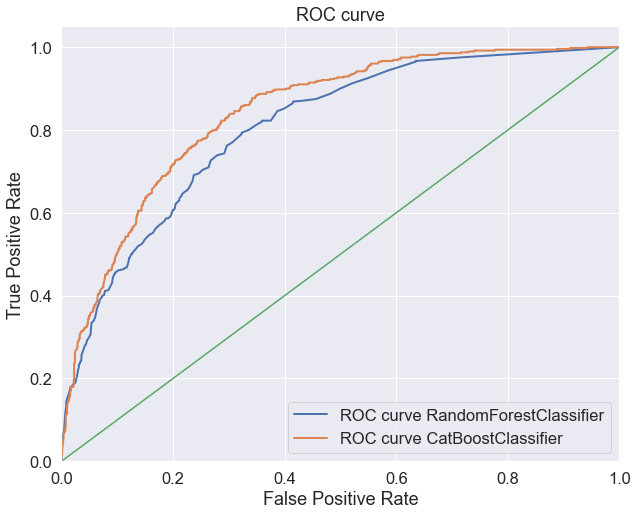

In [26]:
# Построим  ROC-кривую
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, preds_1, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve RandomForestClassifier')
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, preds_2, pos_label=1)
lw = 2
plt.plot(fpr_2, tpr_2, lw=lw, label='ROC curve CatBoostClassifier')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.legend()
plt.show()

Видим, что ROC-кривая при использовании CatBoostClassifier выше чем при использовании RandomForestClassifier

### Сохраним наш пайплайн

In [28]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline_1, f)